# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Полносвязные нейронные сети.

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2024-11-25 13:05:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [     <=>            ] 201.24M  24.6MB/s    in 8.5s    

2024-11-25 13:05:44 (23.7 MB/s) - ‘data.txt.zip’ saved [211011981]



In [ ]:
df = pd.read_csv('data.txt.zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

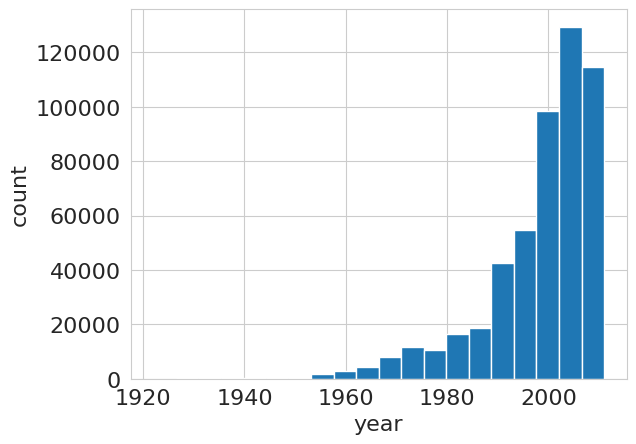

Range: 1922 - 2011
Unique values: 89


In [ ]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

89.74966389498053


Поскольку минимум MSE при константном прогнозе достигается при среднем значении (это свойство дисперсии), то надо обучиться на среднем

In [ ]:
constant_prediction = np.mean(y_train)

y_pred = np.full(y_test.shape, constant_prediction)

mse = mean_squared_error(y_test, y_pred)
print(mse)

117.62580230734426


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [ ]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    '''
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):

            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [ ]:
d = {}
for i in range(len(np.sort(df[0].unique()))):
    d[np.sort(df[0].unique())[i]] = i
len(d)

89

In [ ]:
y_train

array([2001, 1996, 2009, ..., 2003, 1977, 1999])

In [ ]:
y_train_new = np.array([int(d[i]) for i in y_train])
y_train_new

array([78, 73, 86, ..., 80, 54, 76])

In [ ]:
y_val_new = np.array([int(d[i]) for i in y_val])
y_val_new

array([83, 80, 80, ..., 67, 64, 80])

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train_new = torch.tensor(y_train_new, dtype=torch.long)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val_new = torch.tensor(y_val_new, dtype=torch.long)

dataset_train = TensorDataset(X_train, y_train_new)
dataset_val = TensorDataset(X_val, y_val_new)

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

In [ ]:
# torch.utils.data.TensorDataset(X_train)

In [ ]:
input_shape = X_train.shape[1]
C = len(d)

model = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, C)
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [ ]:
criterion = nn.CrossEntropyLoss()
metric = lambda outputs, targets: nn.functional.mse_loss(torch.argmax(outputs).float(), targets)

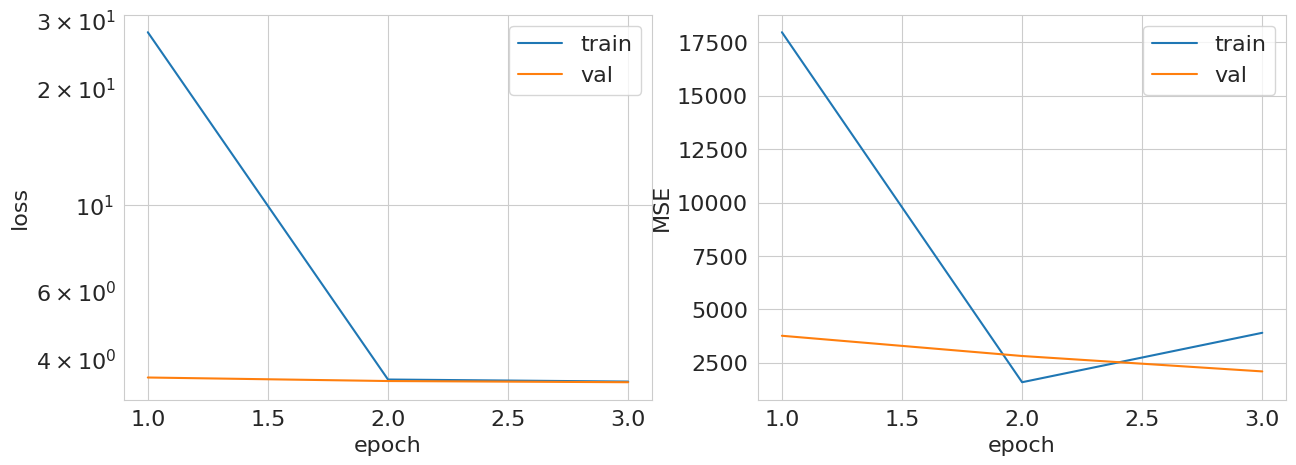

Validation MSE: 2101.557


(3908.5859921833153, 2101.557152761896)

In [ ]:
train_and_validate(model, optimizer, criterion, metric, dataloader_train, dataloader_val, 3)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** MSE большой, гораздо хуже, чем просто линейная регрессия или даже константа. Вообще сама по себе идея обучать классификатор при таком большом количестве классов и параметров довольно странная. Грубо говоря, мы хотим ничего не делая с данными получить сразу хороший результат. Видно, что модель переобучается

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train_regr = torch.tensor(y_train, dtype=torch.float32)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val_regr = torch.tensor(y_val, dtype=torch.float32)

dataset_train = TensorDataset(X_train, y_train_regr.reshape(-1, 1))
dataset_val = TensorDataset(X_val, y_val_regr.reshape(-1, 1))

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

<ipython-input-125-dc9c2fcc2b0f>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-125-dc9c2fcc2b0f>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)


In [ ]:
model1 = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [ ]:
# model(torch.rand(input_shape))

In [ ]:
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-6)

In [ ]:
criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs, targets)

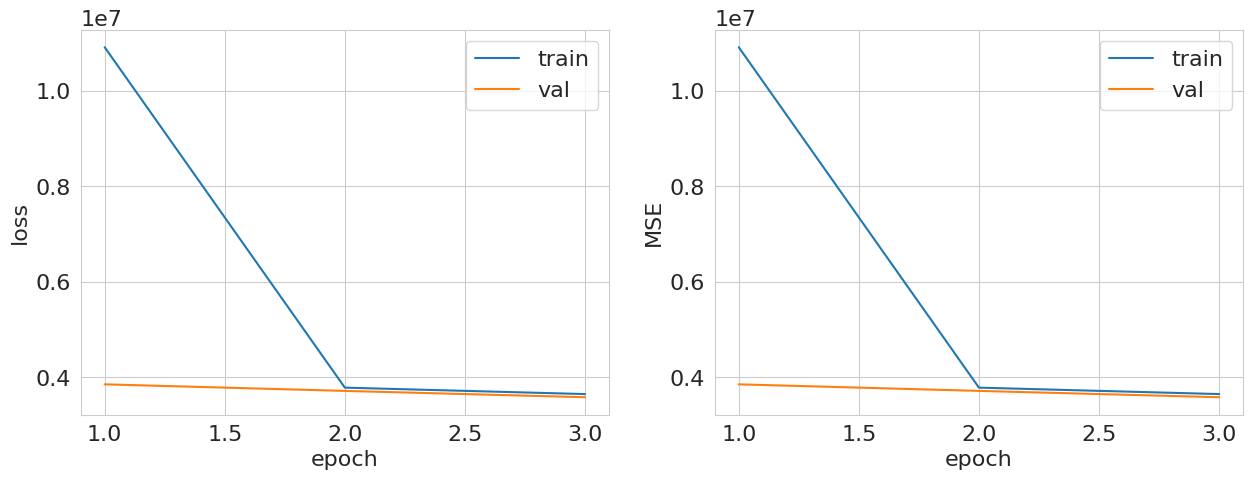

Validation MSE: 3585113.167


(3650833.482319469, 3585113.1671168515)

In [ ]:
train_and_validate(model1, optimizer, criterion, metric, dataloader_train, dataloader_val, 3)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** В этом задании получаются разные результаты в зависимости от запуска и значения lr. Иногда результаты меньше, чем в предыдущем задании (но все еще гораздо хуже даже константы), иногда просто None, сейчас получилось огромное число. Скорее всего проблема в подсчете градиентов (видимо, они слишком большие, поэтому уменьшение lr может спасти). Из распределения по годам видно, что есть перекос в сторону 00-годов. Очевидно, простая сеть (с одной нелинейностью) может не увидеть эту закономерность в данных.


**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [ ]:
def normalize(sample):
    min_val = torch.min(sample)
    max_val = torch.max(sample)
    normalized_sample = (sample - min_val)/(max_val - min_val)
    return normalized_sample, min_val, max_val

def denormalize(sample, original_max, original_min):
    denormalized_sample = sample*(original_max - original_min) + original_min
    return denormalized_sample

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений.

У нас статистики собраны на тренировочных данных - я их применяю для валидации в денормализации

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train_new1, y_train_min1, y_train_max1 = normalize(torch.tensor(y_train))
y_train_new1 = torch.tensor(y_train_new1, dtype=torch.float32)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val_new1, _, _ = normalize(torch.tensor(y_val))
y_val_new1 = torch.tensor(y_val_new1, dtype=torch.float32)

dataset_train = TensorDataset(X_train, y_train_new1.reshape(-1, 1))
dataset_val = TensorDataset(X_val, y_val_new1.reshape(-1, 1))

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

<ipython-input-132-cc481e666ec0>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-132-cc481e666ec0>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_new1 = torch.tensor(y_train_new1, dtype=torch.float32)
<ipython-input-132-cc481e666ec0>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
<ipython-input-132-cc481e666ec0>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detac

In [ ]:
model2 = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

In [ ]:
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-2)

In [ ]:
criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(denormalize(outputs, y_train_max1, y_train_min1), denormalize(targets, y_train_max1, y_train_min1))

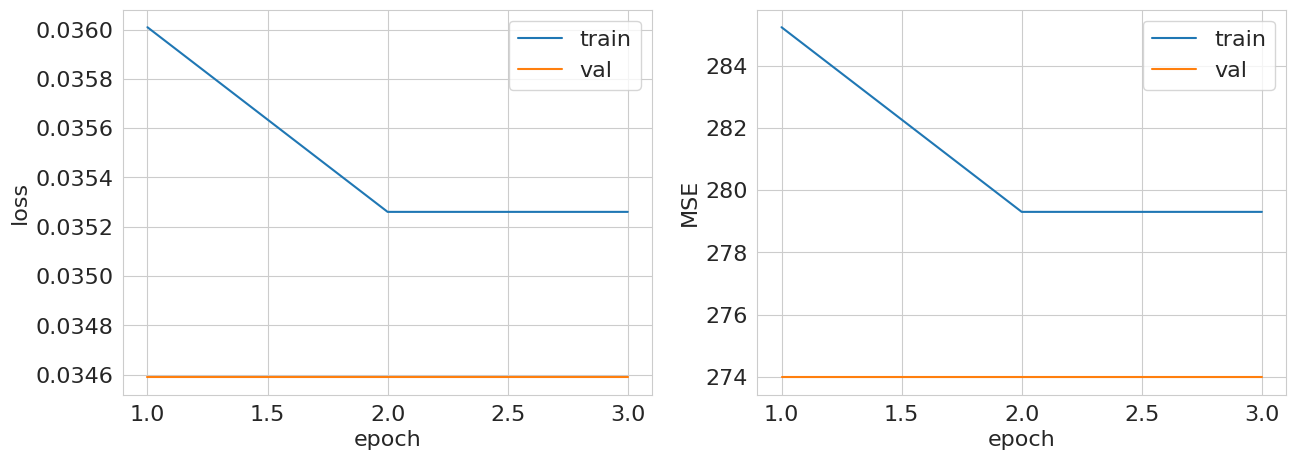

Validation MSE: 273.986


(279.29899165519646, 273.98618517793784)

In [ ]:
train_and_validate(model2, optimizer, criterion, metric, dataloader_train, dataloader_val, 3)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском.

**Ответ:** Сейчас мы получили уже значения по порядку сравнимые с тем, что мы получили на Ridge-регресии (но пока еще сильно больше) и гораздо лучше, чем в предыдущем задании. Нормализация данных сыграла

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

Я знаю, что можно использовать команды из sklearn, но там были какие-то проблемы с переводом в torch формат, поэтому я сделал это вручную, так даже удобнее, не нужно постоянно думать про формат. Кол-во эпох я увеличил на одну штуку, потому что и так много времени учится (дальше много подобных заданий)

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train_regr = torch.tensor(y_train, dtype=torch.float32)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val_regr = torch.tensor(y_val, dtype=torch.float32)

dataset_train = TensorDataset(X_train, y_train_regr.reshape(-1, 1))
dataset_val = TensorDataset(X_val, y_val_regr.reshape(-1, 1))

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

<ipython-input-137-dc9c2fcc2b0f>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-137-dc9c2fcc2b0f>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)


In [ ]:
mean_X = torch.mean(X_train, dim=0)
std_X = torch.std(X_train, dim=0)

mean_y = torch.mean(y_train_regr)
std_y = torch.std(y_train_regr)

normalized_X_train = (torch.tensor(X_train) - mean_X)/std_X
normalized_y_train = (torch.tensor(y_train_regr) - mean_y)/std_y

normalized_X_val = (torch.tensor(X_val) - mean_X)/std_X
normalized_y_val = (torch.tensor(y_val_regr) - mean_y)/std_y

<ipython-input-138-15e2bdcbc201>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_X_train = (torch.tensor(X_train) - mean_X)/std_X
<ipython-input-138-15e2bdcbc201>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_y_train = (torch.tensor(y_train_regr) - mean_y)/std_y
<ipython-input-138-15e2bdcbc201>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_X_val = (torch.tensor(X_val) - mean_X)/std_X
<ipython-input-138-15e2bdcbc201>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTe

In [ ]:
dataset_train = TensorDataset(normalized_X_train, normalized_y_train.reshape(-1, 1))
dataset_val = TensorDataset(normalized_X_val, normalized_y_val .reshape(-1, 1))

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

In [ ]:
model3 = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

In [ ]:
optimizer = torch.optim.SGD(model3.parameters(), lr=1e-2)

In [ ]:
criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)

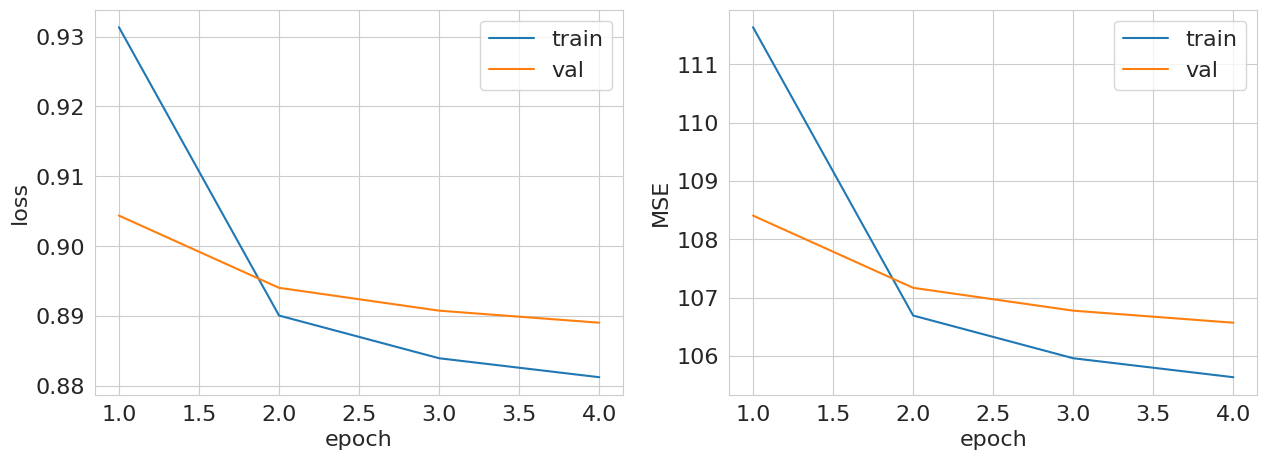

Validation MSE: 106.570


(105.63509149842974, 106.5696647018939)

In [ ]:
train_and_validate(model3, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)

Немного лучше константы, довольно сильно лучше, чем предыдущие нейросети,но все еще хуже регрессии (несильно хуже)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества. В заданиях 2.1-2.3 **запускайте эксперименты несколько раз (4-5)** с одинаковыми значениями гиперпараметров обучения, но с разными случайными инициализациями сети (достаточно просто прогнать код с инициализацией модели и ее обучением в цикле: каждый вызов конструктора инициализирует модель случайно). Для сравнения качества разных экспериментов **отрисовывайте ящики с усами (boxplot)** по этим нескольким запускам.

Задание 2.4 требует перебора гиперпараметров, в нем запускайте эксперимент по одному разу для каждого рассмотренного значения, чтобы сэкономить время.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train_regr = torch.tensor(y_train, dtype=torch.float32)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val_regr = torch.tensor(y_val, dtype=torch.float32)

dataset_train = TensorDataset(X_train, y_train_regr.reshape(-1, 1))
dataset_val = TensorDataset(X_val, y_val_regr.reshape(-1, 1))

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

In [ ]:
mean_X = torch.mean(X_train, dim=0)
std_X = torch.std(X_train, dim=0)

mean_y = torch.mean(y_train_regr)
std_y = torch.std(y_train_regr)

normalized_X_train = (torch.tensor(X_train) - mean_X)/std_X
normalized_y_train = (torch.tensor(y_train_regr) - mean_y)/std_y

normalized_X_val = (torch.tensor(X_val) - mean_X)/std_X
normalized_y_val = (torch.tensor(y_val_regr) - mean_y)/std_y

<ipython-input-16-15e2bdcbc201>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_X_train = (torch.tensor(X_train) - mean_X)/std_X
<ipython-input-16-15e2bdcbc201>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_y_train = (torch.tensor(y_train_regr) - mean_y)/std_y
<ipython-input-16-15e2bdcbc201>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_X_val = (torch.tensor(X_val) - mean_X)/std_X
<ipython-input-16-15e2bdcbc201>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor

In [ ]:
dataset_train = TensorDataset(normalized_X_train, normalized_y_train.reshape(-1, 1))
dataset_val = TensorDataset(normalized_X_val, normalized_y_val .reshape(-1, 1))

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

In [ ]:
model4 = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

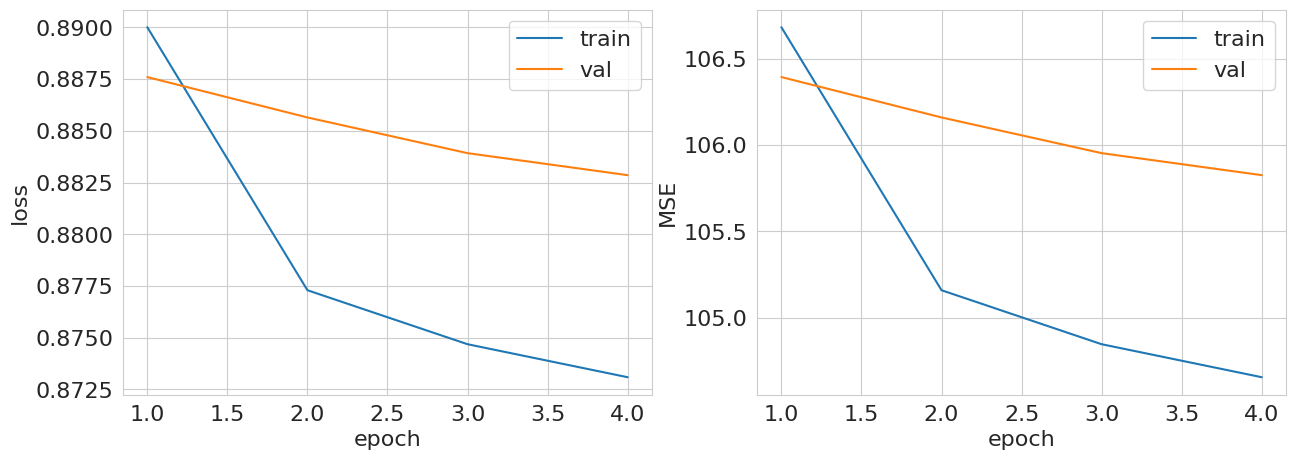

Validation MSE: 105.825


(104.65443259308577, 105.82496947998999)

In [ ]:
optimizer = torch.optim.SGD(model4.parameters(), lr=1e-2, momentum=0.9)

criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)

train_and_validate(model4, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)

In [ ]:
model_tmp = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

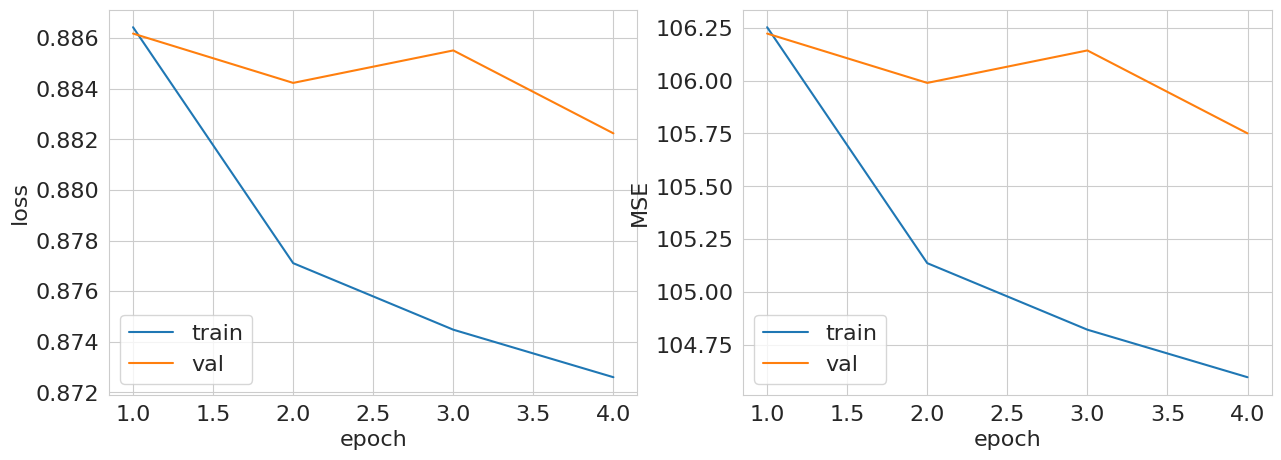

Validation MSE: 105.751


(104.59550194136585, 105.75052138838645)

In [ ]:
optimizer = torch.optim.Adam(model_tmp.parameters(), lr=1e-3)

criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)

train_and_validate(model_tmp, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)

Мы еще немного улучшили предыдущие результаты. Adam чуть лучше (поэтому дальше его берем), но в целом без разницы

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

Делаем нейросетку шире

In [ ]:
model5 = nn.Sequential(
    nn.Linear(input_shape, 256),
    nn.ReLU(),
    nn.Linear(256, C),
    nn.Sigmoid()
)

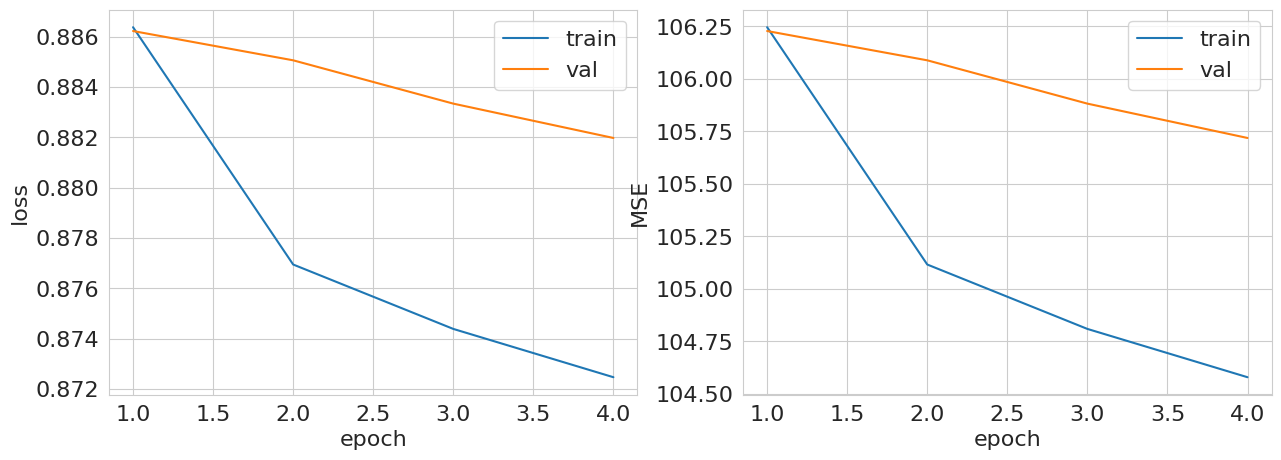

Validation MSE: 105.719


(104.5791914978757, 105.71893564307325)

In [ ]:
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-3)

criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)

train_and_validate(model5, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)

Теперь делаем глубже

In [ ]:
model6 = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

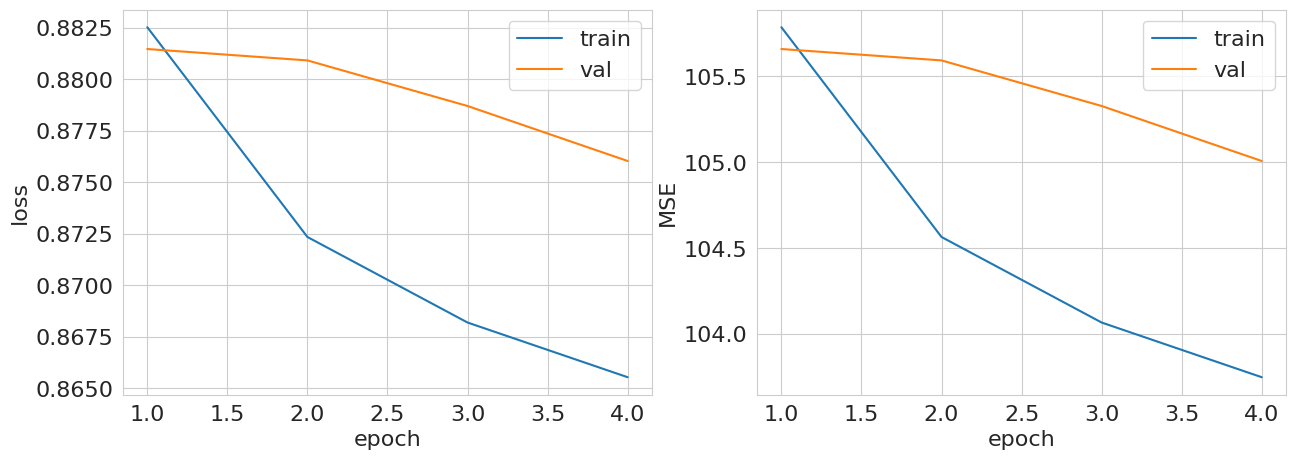

Validation MSE: 105.008


(103.74943699797367, 105.00762227780562)

In [ ]:
optimizer = torch.optim.Adam(model6.parameters(), lr=1e-3)

criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)

train_and_validate(model6, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)

Честно говоря, я не вижу здесь прям переобучения какого-то, примерно то же самое, что и раньше. Мб дело в том, что я обучил на маленьком числе эпох + ну не то, чтобы нейросеть стала прям сильно шире или глубже

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты.

In [ ]:
model7 = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

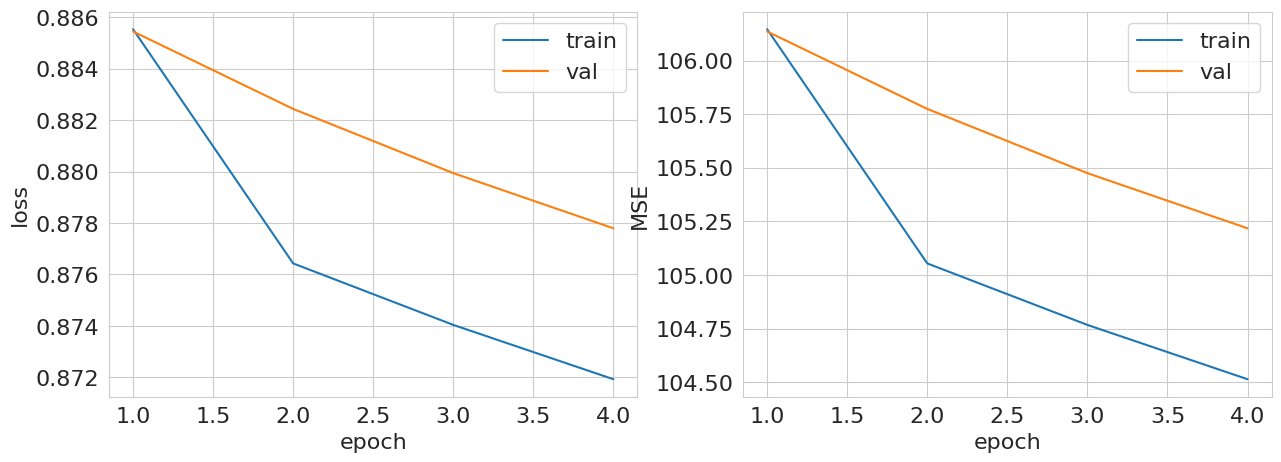

Validation MSE: 105.218


(104.51437532638367, 105.21799526696041)

In [ ]:
optimizer = torch.optim.Adam(model7.parameters(), lr=1e-3)

criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)

train_and_validate(model7, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)

In [ ]:
model8 = nn.Sequential(
    nn.Linear(input_shape, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 1),
    nn.Dropout(p=0.2),
    nn.Sigmoid()
)

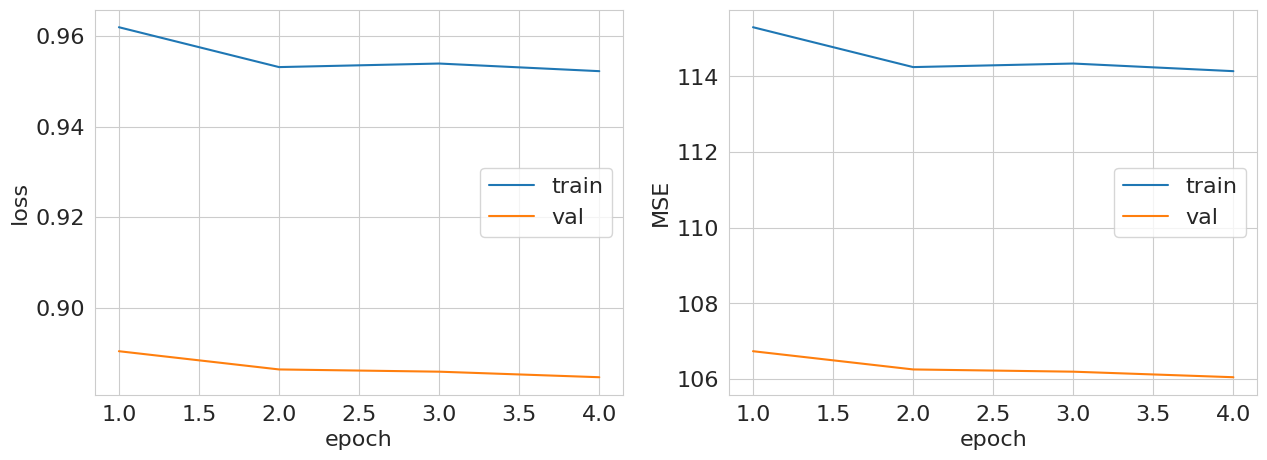

Validation MSE: 106.044


(114.13796573933571, 106.04449175865518)

In [ ]:
optimizer = torch.optim.Adam(model8.parameters(), lr=1e-3)

criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)

train_and_validate(model8, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)

Ну опять-таки не то, чтобы сильно прям поменялось, примерно те же результаты (причины, наверное, те же - мало эпох). Но я бы dropout оставил, потому что результаты примерно такие же, dropout по смыслу точно борется с переобучением, а вот то, что мы раньше делали в теории может оказаться переобученным на test (это маловероятно, но возможно)

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

Выбрал самую осмысленную сеть из того, что раньше было. Дальше тюнил параметры (но разбил на 3 ячейки с разными lr, потому что когда я делал в одной ячейке все выполнялось медленно и коллаб в конце концов отмирал)

In [ ]:
model10 = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

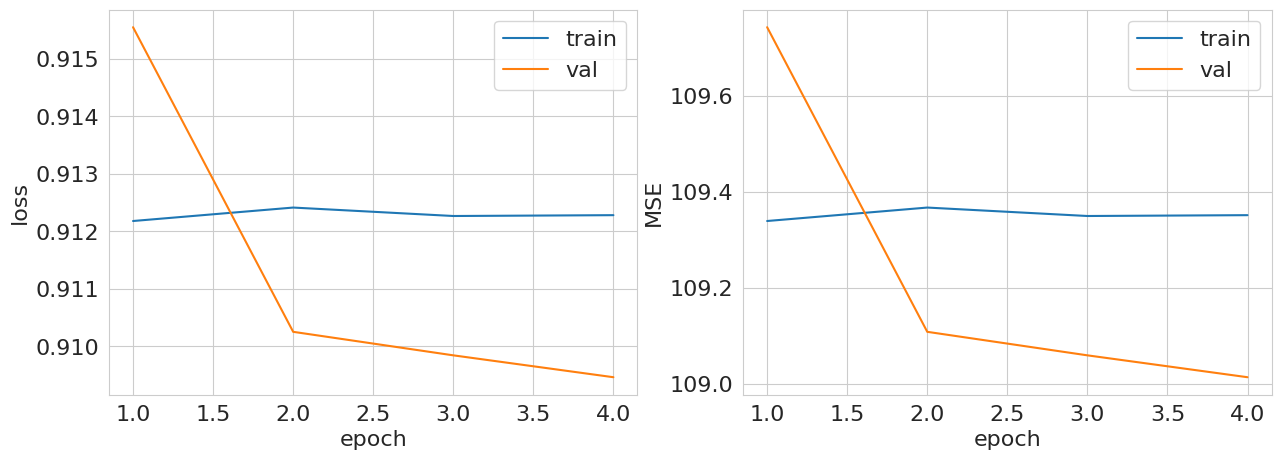

Validation MSE: 109.014


In [ ]:
learning_rates = [1e-2]
weight_decays = [0, 1e-6, 1e-5, 1e-4, 1e-3]

# Словарь с результатами
results = {}

for lr in learning_rates:
    # print('learning rate', lr)
    results[lr] = {}
    for wd in weight_decays:
        print('learning rate', lr)
        print('weight_decays', wd)
        optimizer = torch.optim.Adam(model10.parameters(), lr=lr, weight_decay = wd)
        criterion = nn.functional.mse_loss
        metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)
        mse_train, mse_val = train_and_validate(model10, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)
        results[lr][wd] = (mse_train, mse_val)



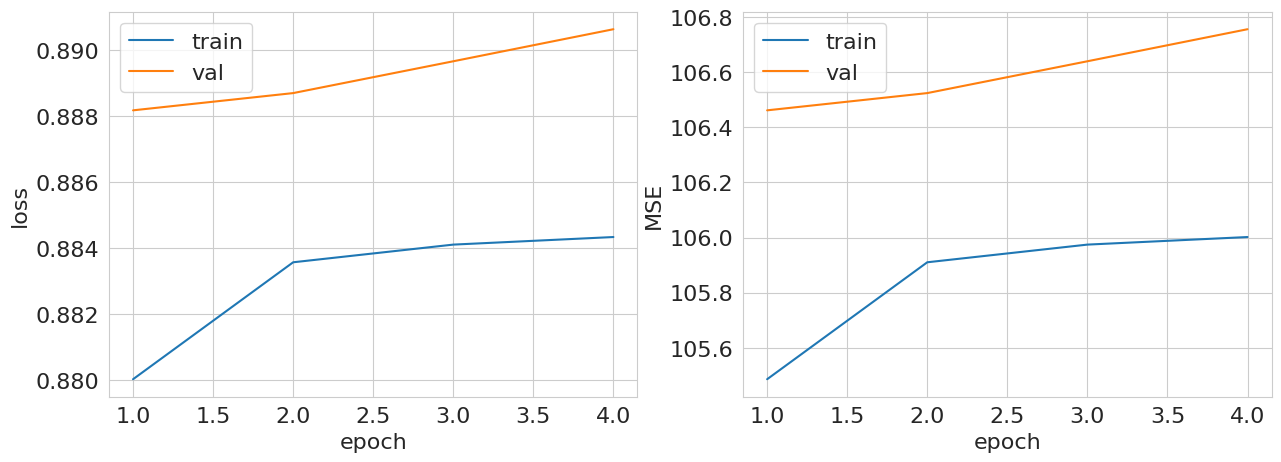

Validation MSE: 106.756


In [ ]:
learning_rates = [1e-3]

for lr in learning_rates:
    # print('learning rate', lr)
    results[lr] = {}
    for wd in weight_decays:
        print('learning rate', lr)
        print('weight_decays', wd)
        optimizer = torch.optim.Adam(model10.parameters(), lr=lr, weight_decay = wd)
        criterion = nn.functional.mse_loss
        metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)
        mse_train, mse_val = train_and_validate(model10, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)
        results[lr][wd] = (mse_train, mse_val)

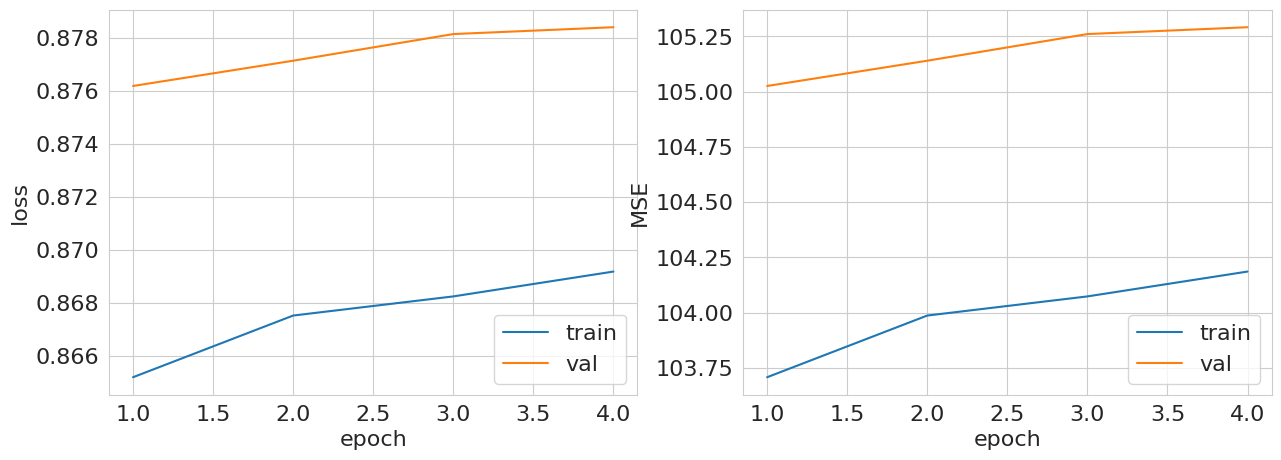

Validation MSE: 105.292


In [ ]:
learning_rates = [1e-4]

for lr in learning_rates:
    # print('learning rate', lr)
    results[lr] = {}
    for wd in weight_decays:
        print('learning rate', lr)
        print('weight_decays', wd)
        optimizer = torch.optim.Adam(model10.parameters(), lr=lr, weight_decay = wd)
        criterion = nn.functional.mse_loss
        metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)
        mse_train, mse_val = train_and_validate(model10, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)
        results[lr][wd] = (mse_train, mse_val)

In [ ]:
results

{0.01: {0: (108.5652317413204, 108.34554007386303),
  1e-06: (108.19972144672384, 109.2407922277818),
  1e-05: (107.9938032363249, 109.01355500291179),
  0.0001: (108.12400835452223, 109.32921930943367),
  0.001: (109.35200290920159, 109.01424923553257)},
 0.001: {0: (104.53501799459923, 105.36940110802227),
  1e-06: (104.08283746003555, 105.07668150879559),
  1e-05: (103.8544237108936, 104.9660425760472),
  0.0001: (104.49002950609255, 105.5180096030007),
  0.001: (106.00195223607385, 106.75634704622689)},
 0.0001: {0: (104.46438015776242, 105.38955501991569),
  1e-06: (104.02587594690893, 105.12815438192135),
  1e-05: (103.70979452544579, 104.93438172519281),
  0.0001: (103.56170451661193, 104.90073479567496),
  0.001: (104.1859212886532, 105.29161889465699)}}

In [ ]:
x_values = list(results.keys())
y_values = list(results[x_values[0]].keys())
x_values
# y_values

[0.01, 0.001, 0.0001]

In [ ]:
print(list(enumerate(x_values)))

[(0, 0.01), (1, 0.001), (2, 0.0001)]


[[0.01   0.001  0.0001]
 [0.01   0.001  0.0001]
 [0.01   0.001  0.0001]
 [0.01   0.001  0.0001]
 [0.01   0.001  0.0001]]
[[0.e+00 0.e+00 0.e+00]
 [1.e-06 1.e-06 1.e-06]
 [1.e-05 1.e-05 1.e-05]
 [1.e-04 1.e-04 1.e-04]
 [1.e-03 1.e-03 1.e-03]]
[[108.34554007 109.24079223 109.013555   109.32921931 109.01424924]
 [105.36940111 105.07668151 104.96604258 105.5180096  106.75634705]
 [105.38955502 105.12815438 104.93438173 104.9007348  105.29161889]]


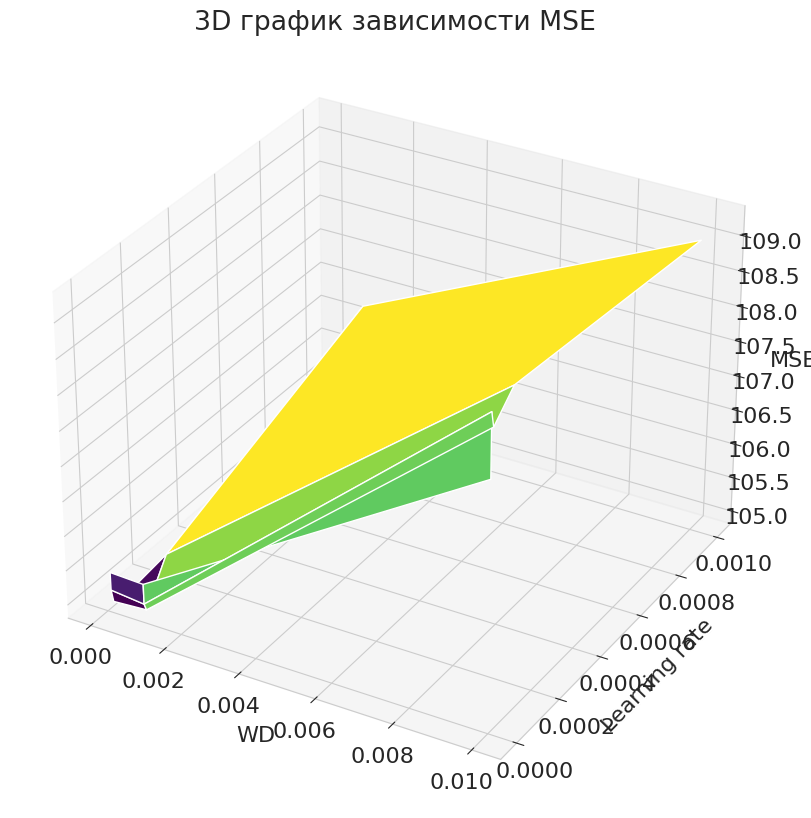

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(x_values, y_values)
print(X)
print(Y)
# Z = np.zeros_like(X, dtype=float)
Z = np.zeros((len(x_values), len(y_values)))

# for i in x_values:
#     # print(i)
#     tmp_lr_fixed = results[i]
#     # print(tmp)
#     for j in tmp_lr_fixed:
#         Z[i, j] = tmp_lr_fixed[j]

# print(Z)
    # for j, y in enumerate(y_values):

        # Z[i, j] = results[x][y]
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        # print(results[x][y][1])
        Z[i, j] = results[x][y][1]
print(Z)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z.T, cmap='viridis')
ax.set_title('3D график зависимости MSE')
ax.set_xlabel('WD')
ax.set_ylabel('Learning rate')
ax.set_zlabel('MSE')

plt.show()

In [ ]:
Z.min()

104.90073479567496

Это полученное минимальное значение на val, параметры следующие:
lr = 0.0001, weigth_decay = 0.0001: (103.56170451661193, 104.90073479567496)

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это.

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train_regr = torch.tensor(y_train, dtype=torch.float32)

X_val = torch.tensor(X_test, dtype=torch.float32)
y_val_regr = torch.tensor(y_test, dtype=torch.float32)

dataset_train = TensorDataset(X_train, y_train_regr.reshape(-1, 1))
dataset_val = TensorDataset(X_val, y_val_regr.reshape(-1, 1))

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

In [ ]:
mean_X = torch.mean(X_train, dim=0)
std_X = torch.std(X_train, dim=0)

mean_y = torch.mean(y_train_regr)
std_y = torch.std(y_train_regr)

normalized_X_train = (torch.tensor(X_train) - mean_X)/std_X
normalized_y_train = (torch.tensor(y_train_regr) - mean_y)/std_y

normalized_X_val = (torch.tensor(X_val) - mean_X)/std_X
normalized_y_val = (torch.tensor(y_val_regr) - mean_y)/std_y

<ipython-input-170-15e2bdcbc201>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_X_train = (torch.tensor(X_train) - mean_X)/std_X
<ipython-input-170-15e2bdcbc201>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_y_train = (torch.tensor(y_train_regr) - mean_y)/std_y
<ipython-input-170-15e2bdcbc201>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalized_X_val = (torch.tensor(X_val) - mean_X)/std_X
<ipython-input-170-15e2bdcbc201>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTe

In [ ]:
dataset_train = TensorDataset(normalized_X_train, normalized_y_train.reshape(-1, 1))
dataset_val = TensorDataset(normalized_X_val, normalized_y_val .reshape(-1, 1))

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True)

In [ ]:
model_final = nn.Sequential(
    nn.Linear(input_shape, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

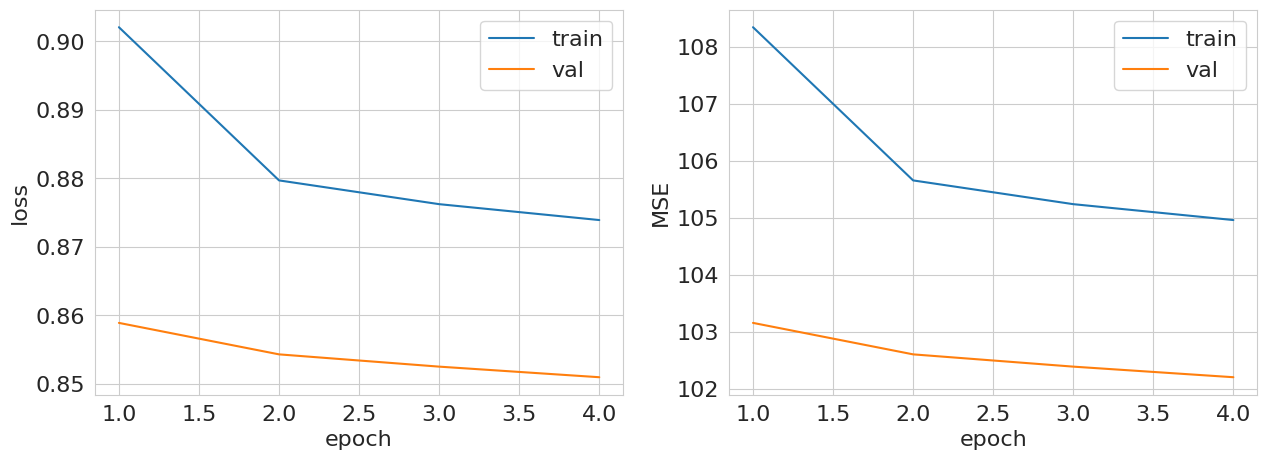

Validation MSE: 102.207


(104.96298995035721, 102.20729063632702)

In [ ]:
optimizer = torch.optim.Adam(model_final.parameters(), lr=0.0001, weight_decay = 0.0001)
criterion = nn.functional.mse_loss
metric = lambda outputs, targets: nn.functional.mse_loss(outputs*std_y + mean_y, targets*std_y + mean_y)

train_and_validate(model_final, optimizer, criterion, metric, dataloader_train, dataloader_val, 4)

Выбрал лучшие параметры из предыдущего задания и обучился на всем train, проверил на test, получил небольшое улучшение по сравнению с прошлыми нейросетями, но все еще хуже Ridge-регресии. Скорее всего тут дело в том, что там я довольно сильно выкинул (большой alpha = 0.1) лишние параметры, а вот эта нейросеть хоть и с dropout, тем не менее имеет скорее всего все еще большое количество параметров. Я бы подумал не об аналоге l2-регуляризации на нейросети (weight-decay), а об аналоге l1 или аналоге pca (а может такие задачи решать с помощью нейросетей - это как стрелять из пушки по воробьям - неправильно по смыслу).
